<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_10_Bike_Shares/Rank_9_Leandro_Benetton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Sprint #10: Bike Share Data
### Predict the future bike shares

Link: https://dphi.tech/practice/challenge/39#data

### Leandro Benetton
#### Linkedin: https://www.linkedin.com/in/leandrobenetton/

### Content

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, users are able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.



<img src="bike.jpg">

### Load the necesary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

import os

from math import sqrt

### Load the data

In [ ]:
bike_share_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_train.csv" )
bike_share_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,10136,03-03-2012,1,1,3,9,0,6,0,3,0.38,0.3939,0.87,0.0896,94
1,6987,23-10-2011,4,0,10,17,0,0,0,1,0.50,0.4848,0.63,0.1343,340
2,14303,24-08-2012,3,1,8,3,0,5,1,1,0.64,0.6061,0.73,0.0000,8
3,2295,10-04-2011,2,0,4,11,0,0,0,2,0.40,0.4091,0.87,0.1343,202
4,7869,29-11-2011,4,0,11,12,0,2,1,3,0.42,0.4242,0.82,0.4179,18


In [ ]:
bike_share_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,8716.116809,2.507660,0.504855,6.546788,11.550313,0.029634,3.000360,0.680573,1.425376,0.496537,0.475354,0.626633,0.189935,189.526433
std,5028.742843,1.109166,0.499994,3.447943,6.909805,0.169581,2.009132,0.466272,0.640678,0.192830,0.172028,0.192620,0.122033,181.112169
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4370.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8732.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,143.000000
75%,13075.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700,976.000000


In [ ]:
bike_share_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [ ]:
corr = bike_share_data.corr()
print(corr)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.407239  0.866082  0.492576 -0.004865  0.012710   
season      0.407239  1.000000 -0.008076  0.832351 -0.001137 -0.005414   
yr          0.866082 -0.008076  1.000000 -0.006422 -0.008425  0.001696   
mnth        0.492576  0.832351 -0.006422  1.000000  0.001535  0.023094   
hr         -0.004865 -0.001137 -0.008425  0.001535  1.000000  0.007076   
holiday     0.012710 -0.005414  0.001696  0.023094  0.007076  1.000000   
weekday     0.006143 -0.003665  0.000750  0.010636 -0.006004 -0.101793   
workingday -0.002575  0.003967  0.003721 -0.011933  0.002097 -0.255081   
weathersit -0.015782 -0.016227 -0.021268  0.005382 -0.020596 -0.012748   
temp        0.138003  0.312258  0.042559  0.202703  0.135636 -0.020971   
atemp       0.140438  0.320503  0.041340  0.210263  0.132051 -0.024351   
hum         0.007864  0.148359 -0.084845  0.163410 -0.276947 -0.009541   
windspeed  -0.076774 -0.152505 -0.0086

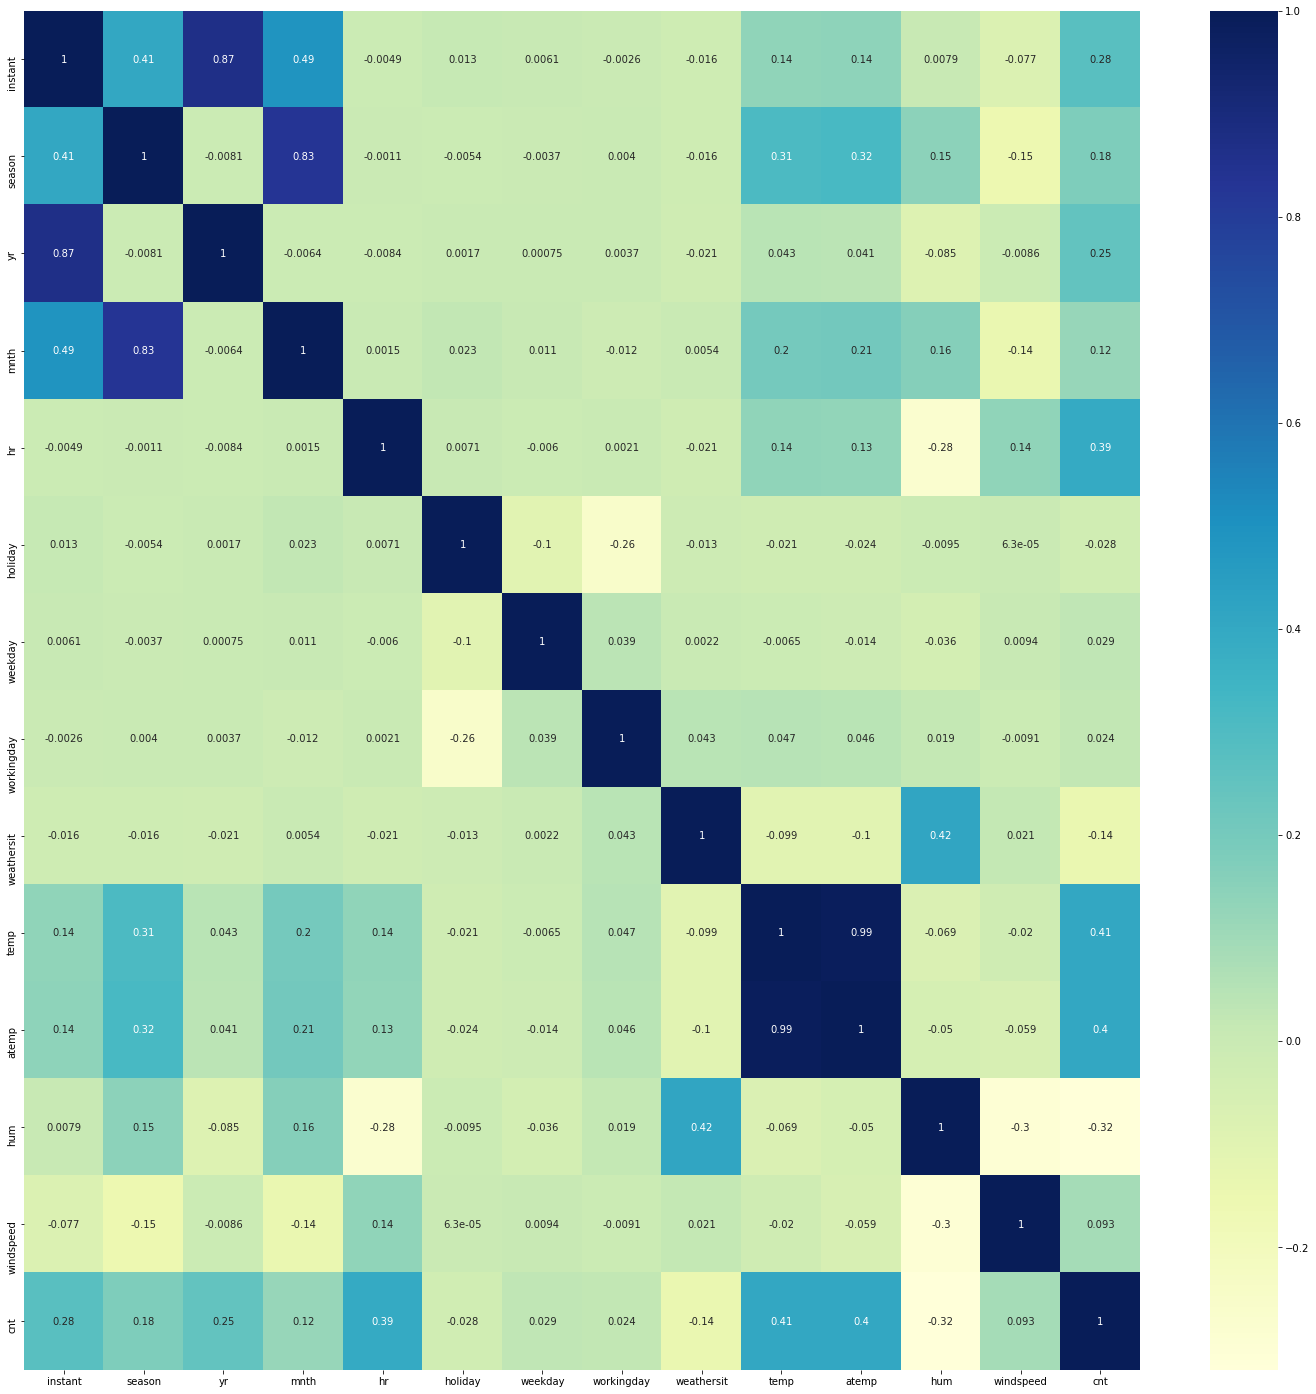

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(corr, square=False, annot=True, cmap='YlGnBu')

In [ ]:
bike_share_data['cnt'].describe()

count    13903.000000
mean       189.526433
std        181.112169
min          1.000000
25%         40.000000
50%        143.000000
75%        281.000000
max        976.000000
Name: cnt, dtype: float64

### Number Summary of the Bike Rental Count 'cnt' Feature

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

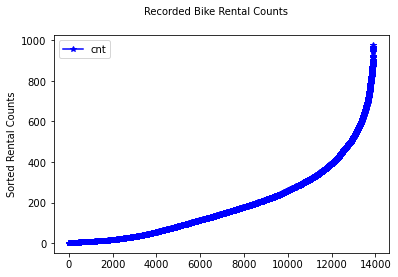

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bike_share_data['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

### Quantitative Features vs. Rental Counts

Text(0, 0.5, 'Count of all Biks Rented')

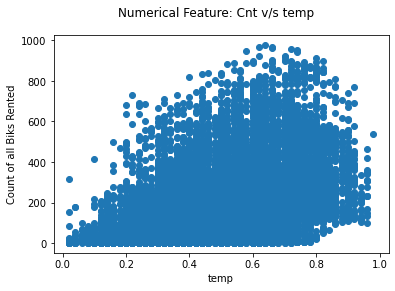

In [ ]:
plt.scatter(bike_share_data['temp'], bike_share_data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

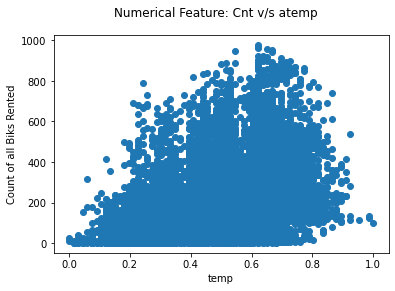

In [ ]:
plt.scatter(bike_share_data['atemp'], bike_share_data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

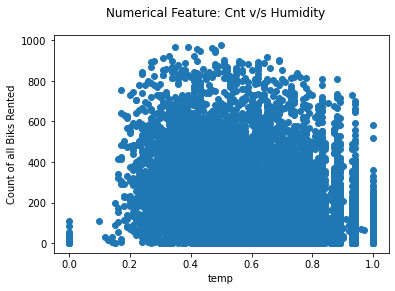

In [ ]:
plt.scatter(bike_share_data['hum'], bike_share_data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s Humidity')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

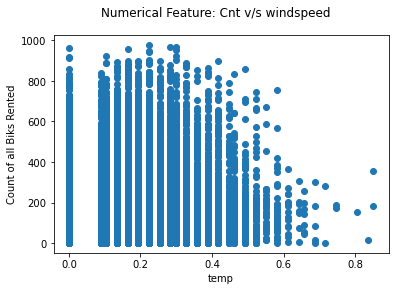

In [ ]:
plt.scatter(bike_share_data['windspeed'], bike_share_data['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

### Let’s Look at Categorical Features

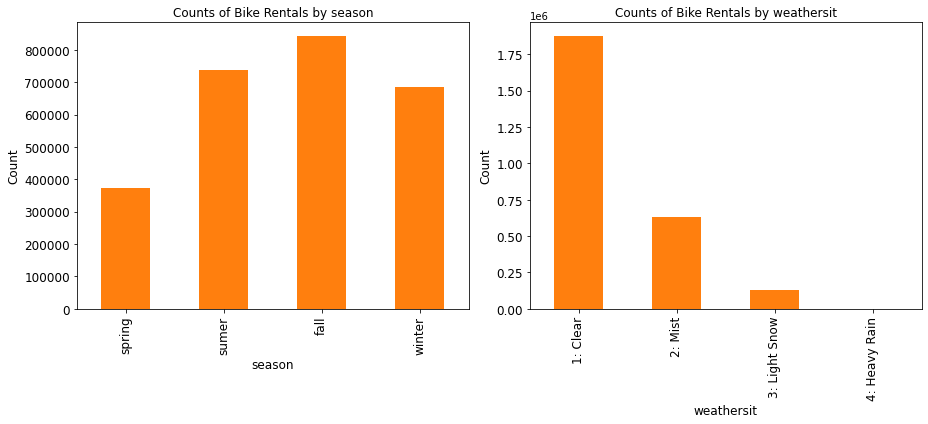

In [ ]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bike_share_data[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bike_share_data[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

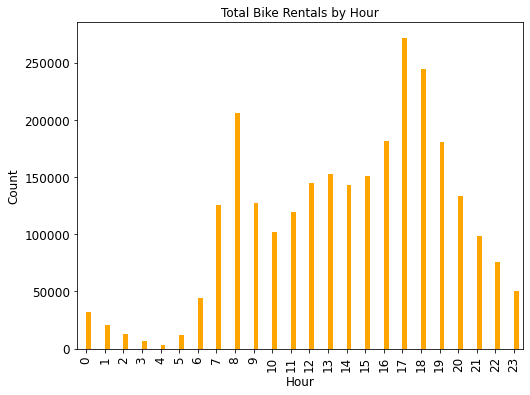

In [ ]:
# alternative way of plotting using groupby
ax = bike_share_data[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

### Model with linear regression

In [ ]:
bikes_df_model_data = bike_share_data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

In [ ]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
1195,1,0,12,16,0,6,0,1,0.32,0.3182,0.42,0.1940
5328,3,0,8,7,0,4,1,2,0.68,0.6364,0.79,0.3284
1423,1,0,3,11,0,3,1,2,0.36,0.3485,0.81,0.1343
11389,1,0,2,9,0,4,1,1,0.36,0.3485,0.57,0.1940
256,1,0,12,11,0,5,1,1,0.40,0.4091,0.58,0.4478
...,...,...,...,...,...,...,...,...,...,...,...,...
5191,4,0,10,20,0,6,0,1,0.52,0.5000,0.77,0.1045
13418,1,1,2,23,0,3,1,1,0.46,0.4545,0.63,0.0896
5390,2,1,6,22,0,1,1,2,0.72,0.6667,0.58,0.1940
860,4,1,10,9,0,5,1,2,0.54,0.5152,0.88,0.1343


In [ ]:
y_train

1195      99
5328     313
1423      75
11389    179
256      174
        ... 
5191     202
13418     97
5390     164
860      403
7270      23
Name: cnt, Length: 9732, dtype: int64

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_train, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

In [ ]:
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 141.19


In [ ]:
# lets copy for editing without effecting original
bikes_df_model_data = bike_share_data.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 121.16


In [ ]:
# lets copy for editing without effecting original
bikes_df_model_data = bike_share_data.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(4)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 4 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 4 degrees: 240.61


### Trying a Nonlinear Model

In [ ]:
def prepare_data_for_model(raw_dataframe, 
                           target_columns, 
                           drop_first = False, 
                           make_na_col = True):
    
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)


In [ ]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bike_share_data.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(bike_df_model_ready.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 
bike_df_model_ready = bike_df_model_ready.drop('weathersit_4.0', axis=1)

outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.2, 
                                                 random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(n_estimators = 5000, max_depth=None, random_state = 0)

# training the model on traning set
rf_model.fit(X_train, y_train)

# make the prediction
y_pred = rf_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with Random Forest: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))


Root Mean squared error with Random Forest: 42.09


In [ ]:
rf_score =rf_model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9916675332727019


### Test Prediction

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_test.csv')

In [ ]:
test_data = test_data.drop(['instant' , 'dteday'], axis=1)

In [ ]:
# simple approach - make a copy for editing without affecting original
#test_data = test_data.copy()
#test_data = test_data.sort_values('instant')

# dummify categorical columns
test_data = prepare_data_for_model(test_data, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(test_data.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
test_data = test_data.dropna() 


In [ ]:
target = rf_model.predict(test_data)

In [ ]:
#target_int = np.ceil(target)
target_int = np.trunc(target)
target_int = target_int.astype(int)
target_int = target_int.clip(min=0)

print(target_int)
print(target)

[212 360  43 ... 620 171 404]
[212.3508 360.153   43.1206 ... 620.8184 171.4156 404.2658]


In [ ]:
res = pd.DataFrame(target_int) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv", index=False) 

## Conclusion

The best model prediction was Random Forest Regressor